<a href="https://colab.research.google.com/github/nivtzur1/EDA---Spotify/blob/main/EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA Project - Genral Information:

**Datasource link:** ***************************************


**Data:**

The data chosen is Soptify songs & artists data.
Out of several possible datasets - the main two were chosen:
1. Artist dataset - where each row represents an artist that exists in Spotify (along with other information such as the artist's genre of music)
2. Track dataset - where each row represents a song from Spotify (along with other details about the song such as length, tempo, release year etc.)

**Goals:**

The main goal of this project is to perform EDA on the Spotify dataset:
- Explore & describe the data
- Presenting suitable graphs & tables
- Performing statistical analysis on the data, and reaching conclusions
- Merging two datasets
- Using pandas functions
- Answering interesting questions regarding the data

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from ast import literal_eval
import pylab 
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

!pip install pandas-profiling==2.7.1
import pandas_profiling 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 256kB 5.1MB/s 
     |████████████████████████████████| 3.1MB 7.9MB/s 
     |████████████████████████████████| 1.1MB 37.5MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
     |████████████████████████████████| 296kB 48.1MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=36699b9eae40eebff2a2e91d699b2670fe242dab7e3ea8cb865ba2f6e905d34f
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=d4f9964cb99acad3bb4dc8243620a722ea6032a1cbc000cc3548c32355fdb741
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing ins

# **Read Datasets**

In [2]:
df_artists = pd.read_csv("artists.csv")
df_tracks = pd.read_csv("tracks.csv")

# **Basic Details & Cleaning Data:**

**First dataset - ARTISTS**

In [3]:
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


After examining null followers values, we decided to replace them with 0

In [4]:
df_artists[df_artists["followers"].isnull()]=0
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104349 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


In [5]:
print("The artist dataset contains", df_artists.shape[0],"rows and",df_artists.shape[1],"columns")

The artist dataset contains 1104349 rows and 5 columns


In [6]:
df_artists.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [7]:
df_artists.describe(include="all")

,id,followers,genres,name,popularity
count,1104349.0,1.104349e+06,1104349,1104349.0,1.104349e+06
unique,1104337.0,NaN,48789,1078650.0,NaN
top,0.0,NaN,[],0.0,NaN
freq,13.0,NaN,805726,13.0,NaN
mean,NaN,1.074292e+04,NaN,NaN,9.083798e+00
std,NaN,2.609539e+05,NaN,NaN,1.376308e+01
min,NaN,0.000000e+00,NaN,NaN,0.000000e+00
25%,NaN,1.000000e+01,NaN,NaN,0.000000e+00
50%,NaN,5.900000e+01,NaN,NaN,2.000000e+00
75%,NaN,4.510000e+02,NaN,NaN,1.400000e+01


There are some 0 values in the 'id' columnn:

In [8]:
df_artists.value_counts('id')

id
0                         13
2LYnplZ8En2Jao1Xkv4iS2     1
2LZ44MLhhXG2SlHhWUOGXg     1
2LZ3j9FcPvimsXU44QgBWW     1
2LZ25CJGU1im2UvzsjKDCY     1
                          ..
53p5kiC47oEvG9E4VKDNl2     1
53p3F9PxpglQP5WcnbBvQ8     1
53p1c0Fnb6srjMorsglFu7     1
53p0jU0si7wv43yMUWtWD7     1
3hh3grAo5pUZQmr1aGA59k     1
Length: 1104337, dtype: int64

Removing 0 values:

In [9]:
print(len(df_artists[df_artists['id'] == 0]),"values removed which are", round(len(df_artists[df_artists['id'] == 0])/df_tracks["name"].shape[0]*100,2), "% of our observations")

13 values removed which are 0.0 % of our observations


In [10]:
print("The tracks dataset contains", df_artists.shape[0],"rows and",df_artists.shape[1],"columns")

The tracks dataset contains 1104349 rows and 5 columns


In [11]:
df_artists=df_artists[df_artists['id']!=0]
df_artists.describe(include = 'all')

,id,followers,genres,name,popularity
count,1104336,1.104336e+06,1104336,1104336,1.104336e+06
unique,1104336,NaN,48788,1078649,NaN
top,6MNqaPY9f00pJw4sS5J4lB,NaN,[],Ace,NaN
freq,1,NaN,805726,12,NaN
mean,NaN,1.074304e+04,NaN,NaN,9.083905e+00
std,NaN,2.609554e+05,NaN,NaN,1.376313e+01
min,NaN,0.000000e+00,NaN,NaN,0.000000e+00
25%,NaN,1.000000e+01,NaN,NaN,0.000000e+00
50%,NaN,5.900000e+01,NaN,NaN,2.000000e+00
75%,NaN,4.510000e+02,NaN,NaN,1.400000e+01


The number of unique values of id_artist is equal to their count, suggesting that each artist is represented once, by a unique identifier.


The number of unique values of name_artist is smaller than their count. 

Also, the freq value for name_artist is larger than one, meaning that there is a possibility that different artists share similar titles or that the same artist was categorized more than once.
We decided not to drop duplicates becuase we intend to merge by id_artist, which is unique.

The mean of the popularity column is larger then the median suggesting a positive skew in the popularity distibution, which makes sense, becuase few artists are popular and most are not

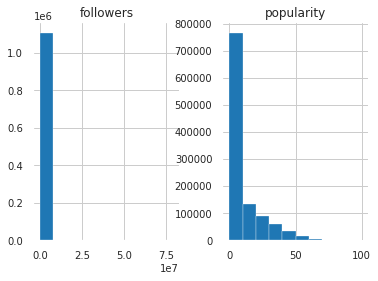

In [12]:
df_artists.hist();

Popularity column is indeed positively skewed, as suspected.
Followers column has a value of 0 for most observations.

 **Second Dataset - TRACKS**

In [13]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497304 entries, 0 to 497303
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                497304 non-null  object 
 1   name              497303 non-null  object 
 2   popularity        497304 non-null  int64  
 3   duration_ms       497304 non-null  int64  
 4   explicit          497304 non-null  int64  
 5   artists           497304 non-null  object 
 6   id_artists        497304 non-null  object 
 7   release_date      497304 non-null  object 
 8   danceability      497304 non-null  float64
 9   energy            497304 non-null  float64
 10  key               497304 non-null  int64  
 11  loudness          497304 non-null  float64
 12  mode              497304 non-null  int64  
 13  speechiness       497304 non-null  float64
 14  acousticness      497304 non-null  float64
 15  instrumentalness  497304 non-null  float64
 16  liveness          49

In [14]:
print("After not being able to locate the missing names on Google, \nand discovering that the id of the artist is categorized as 'various artists', \n we decided to drop these rows, losing", round(df_tracks["name"].isnull().sum()/df_tracks["name"].shape[0]*100,2), "% of our observations")

After not being able to locate the missing names on Google, 
and discovering that the id of the artist is categorized as 'various artists', 
 we decided to drop these rows, losing 0.0 % of our observations


In [15]:
df_tracks.dropna(subset=['name'],inplace=True)
df_tracks.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 497303 entries, 0 to 497303
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                497303 non-null  object 
 1   name              497303 non-null  object 
 2   popularity        497303 non-null  int64  
 3   duration_ms       497303 non-null  int64  
 4   explicit          497303 non-null  int64  
 5   artists           497303 non-null  object 
 6   id_artists        497303 non-null  object 
 7   release_date      497303 non-null  object 
 8   danceability      497303 non-null  float64
 9   energy            497303 non-null  float64
 10  key               497303 non-null  int64  
 11  loudness          497303 non-null  float64
 12  mode              497303 non-null  int64  
 13  speechiness       497303 non-null  float64
 14  acousticness      497303 non-null  float64
 15  instrumentalness  497303 non-null  float64
 16  liveness          49

In [16]:
print("The tracks dataset contains", df_tracks.shape[0],"rows and",df_tracks.shape[1],"columns")

The tracks dataset contains 497303 rows and 20 columns


In [17]:
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


- Not all songs have a full release date, some have only a year.
- Loudness is negative becuase it is in LUFS (Loudness Unit Full Scale)
- Some songs have more than one artist, and more than one artist ID
- Song suration is in Ms

In [18]:
df_tracks.head().describe(include="all")

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,5,5,5.000000,5.000000,5.0,5,5,5,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000
unique,5,5,NaN,NaN,NaN,4,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,NaN,NaN,NaN,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.200000,149346.000000,0.0,NaN,NaN,NaN,0.499400,0.227520,2.200000,-20.303000,0.800000,0.309720,0.889800,0.362760,0.185200,0.366400,122.095600,3.20000
std,NaN,NaN,2.683282,35744.704076,0.0,NaN,NaN,NaN,0.162056,0.135655,2.949576,5.542238,0.447214,0.401964,0.147434,0.434644,0.080142,0.211414,29.237451,1.48324
min,NaN,NaN,0.000000,98200.000000,0.0,NaN,NaN,NaN,0.321000,0.094600,0.000000,-27.961000,0.000000,0.039000,0.674000,0.000000,0.104000,0.127000,102.009000,1.00000
25%,NaN,NaN,0.000000,126903.000000,0.0,NaN,NaN,NaN,0.402000,0.158000,0.000000,-22.136000,1.000000,0.050400,0.797000,0.021800,0.148000,0.196000,103.220000,3.00000
50%,NaN,NaN,0.000000,163080.000000,0.0,NaN,NaN,NaN,0.434000,0.177000,1.000000,-21.180000,1.000000,0.051200,0.989000,0.130000,0.151000,0.397000,104.851000,3.00000
75%,NaN,NaN,0.000000,176907.000000,0.0,NaN,NaN,NaN,0.645000,0.263000,3.000000,-16.900000,1.000000,0.451000,0.994000,0.744000,0.212000,0.457000,130.418000,4.00000


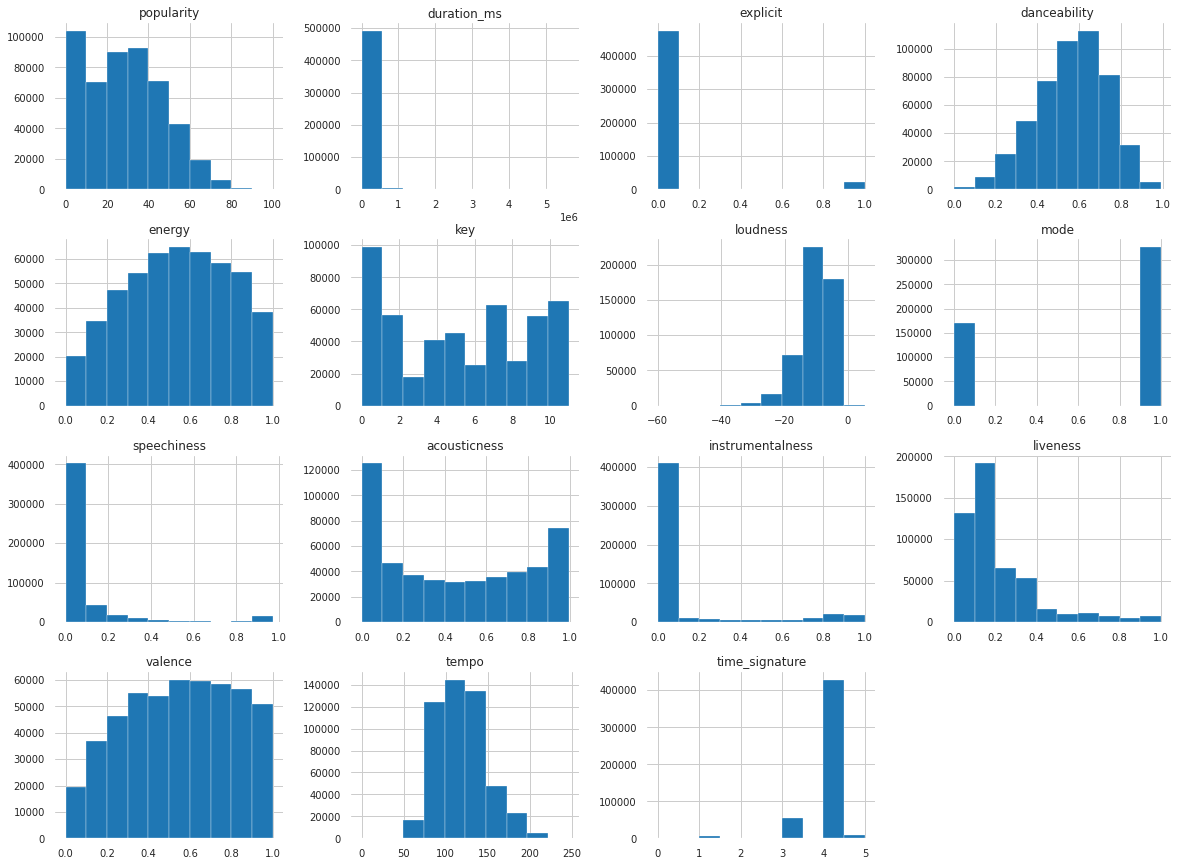

In [19]:
df_tracks.hist(figsize=(20,15));

- liveness, duration - right positive skewed distribution.
- dancalility, energy, valence, tempo - symmetric distributions.
- explicit - binary (can either be explicit or not).
- acousticness - U shaped distribution (few songs combine acoustic and non-acoustic element, therefore the acousticness receives two modes in its minimal and maximal values).
- duration - not clear from the chart, but it is right skewed

# **Merging the Datasets:**

In [20]:
f = lambda x: x.count("', '")+1
df_tracks['artist_count'] = df_tracks['id_artists'].map(f)
df_tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_count
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.67400,0.744000,0.151,0.127,104.851,3.0,1
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.79700,0.000000,0.148,0.655,102.009,1.0,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.99400,0.021800,0.212,0.457,130.418,5.0,1
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.99500,0.918000,0.104,0.397,169.980,3.0,1
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.98900,0.130000,0.311,0.196,103.220,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497299,7JfGhxq9CdNI5R8MnOWI1f,Wieder mal 'nen Tag verschenkt,30,246000,0,['Böhse Onkelz'],['6x9jRPDmA8Ihpw3A9FBowD'],1994,0.592,0.3820,9,-10.456,0,0.0288,0.61700,0.000014,0.229,0.201,130.017,4.0,1
497300,3SrOQHwkuDhfYDxiDix0Zi,Lieder der Nacht,30,177693,0,['Marianne Rosenberg'],['4RVBHXd0cu2qrEyv8jVjQZ'],1994-02-14,0.481,0.7670,11,-6.136,0,0.0711,0.46800,0.000021,0.626,0.583,130.290,4.0,1
497301,47FekEbkOKLq7Nywx7CXls,Die Böhsen Onkelz geben sich die Ehre - Remix ...,30,264760,0,['Böhse Onkelz'],['6x9jRPDmA8Ihpw3A9FBowD'],1994,0.297,0.9050,9,-10.419,1,0.0644,0.00251,0.000004,0.280,0.430,85.161,4.0,1
497302,7HmykwEodWQ87seO7xcxHa,Kapitel 02 - Der Geisterkater (Folge 060),30,90378,0,['Bibi Blocksberg'],['3t2iKODSDyzoDJw7AsD99u'],1994,0.725,0.2730,1,-16.809,1,0.9270,0.68900,0.000000,0.371,0.596,124.039,4.0,1


In [21]:
print("Number of rows is expected to increase to",sum(df_tracks['artist_count']),"rows")

Number of rows is expected to increase to 637713 rows


In [22]:
df_tracks['id_artists'] = df_tracks['id_artists'].apply(literal_eval) #convert to list type
df_tracks = df_tracks.explode('id_artists')
print("Number of rows increased to",df_tracks.shape[0],"after expanding using artist id")

Number of rows increased to 637713 after expanding using artist id


In [23]:
df_artists.rename(columns={"id": "id_artist","name":"name_artist","popularity":"popularity_artist","followers":"followers_artist"},inplace=True)
df_tracks.rename(columns={"id": "id_track","name":"name_track","popularity":"popularity_track"},inplace=True)


df_artists.drop_duplicates(subset=['id_artist'], keep='last')
df_tracks = df_tracks.merge(df_artists, how='left', left_on='id_artists', right_on='id_artist')
print("Number of rows after merge is",df_tracks.shape[0])

Number of rows after merge is 637713


In [24]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637713 entries, 0 to 637712
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_track           637713 non-null  object 
 1   name_track         637713 non-null  object 
 2   popularity_track   637713 non-null  int64  
 3   duration_ms        637713 non-null  int64  
 4   explicit           637713 non-null  int64  
 5   artists            637713 non-null  object 
 6   id_artists         637713 non-null  object 
 7   release_date       637713 non-null  object 
 8   danceability       637713 non-null  float64
 9   energy             637713 non-null  float64
 10  key                637713 non-null  int64  
 11  loudness           637713 non-null  float64
 12  mode               637713 non-null  int64  
 13  speechiness        637713 non-null  float64
 14  acousticness       637713 non-null  float64
 15  instrumentalness   637713 non-null  float64
 16  li

Not all artists ids have been found in the merge.

In [25]:
print("We decided to remove these observations, removing:", round(df_tracks["id_artist"].isnull().sum()/df_tracks["id_artist"].shape[0]*100,2), "% of our observations")

We decided to remove these observations, removing: 3.48 % of our observations


In [26]:
df_tracks.dropna(subset=['id_artist','followers_artist','genres','name_artist','popularity_artist'],inplace=True)

In [27]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615532 entries, 0 to 637712
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_track           615532 non-null  object 
 1   name_track         615532 non-null  object 
 2   popularity_track   615532 non-null  int64  
 3   duration_ms        615532 non-null  int64  
 4   explicit           615532 non-null  int64  
 5   artists            615532 non-null  object 
 6   id_artists         615532 non-null  object 
 7   release_date       615532 non-null  object 
 8   danceability       615532 non-null  float64
 9   energy             615532 non-null  float64
 10  key                615532 non-null  int64  
 11  loudness           615532 non-null  float64
 12  mode               615532 non-null  int64  
 13  speechiness        615532 non-null  float64
 14  acousticness       615532 non-null  float64
 15  instrumentalness   615532 non-null  float64
 16  li

# **Data enrichment:**
- Using only year of release for all datapoints
- Using years to create a decades column
- Transforming duration of songs to seconds

In [28]:
df_tracks['year'] = [d[0:4] for d in df_tracks['release_date']]
df_tracks['year'] = pd.to_numeric(df_tracks['year'])
df_tracks['close_decade'] = round(df_tracks['year'],-1)
df_tracks['duration_s'] = df_tracks['duration_ms']/1000

df_tracks = df_tracks.drop(['duration_ms','release_date','artist_count'],axis=1)

In [29]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615532 entries, 0 to 637712
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_track           615532 non-null  object 
 1   name_track         615532 non-null  object 
 2   popularity_track   615532 non-null  int64  
 3   explicit           615532 non-null  int64  
 4   artists            615532 non-null  object 
 5   id_artists         615532 non-null  object 
 6   danceability       615532 non-null  float64
 7   energy             615532 non-null  float64
 8   key                615532 non-null  int64  
 9   loudness           615532 non-null  float64
 10  mode               615532 non-null  int64  
 11  speechiness        615532 non-null  float64
 12  acousticness       615532 non-null  float64
 13  instrumentalness   615532 non-null  float64
 14  liveness           615531 non-null  float64
 15  valence            615531 non-null  float64
 16  te

# **Analyzing the data & Answering questions**

Pandas Profiling on the entire dataset:

In [30]:
prof = pandas_profiling.ProfileReport(df = df_tracks)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**1. Who is the most followed artist?**

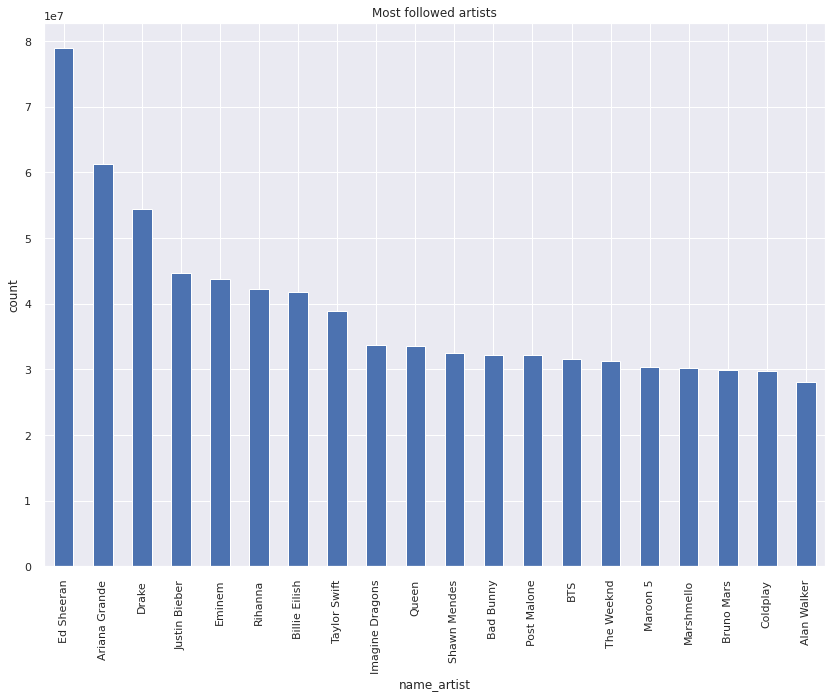

In [57]:
plt.pyplot.figure(figsize=(14,10))
df_popular_artists = df_artists.groupby(['name_artist'])['followers_artist'].sum().sort_values(ascending=False).head(20).plot(kind = 'bar',title = 'Most followed artists',ylabel = 'count');



**2. What are the most popular tracks?**

<Figure size 1008x720 with 0 Axes>

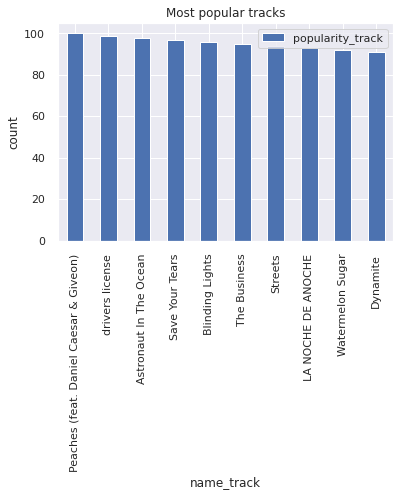

In [58]:
df_popular_track = df_tracks[df_tracks['popularity_track']>90]
plt.pyplot.figure(figsize=(14,10))

df_popular_track[['name_track','popularity_track']].set_index('name_track').drop_duplicates().nlargest(100,columns = 'popularity_track').plot(kind = 'bar',title = 'Most popular tracks',ylabel = 'count');

**3. How many songs per year? Is there a pattern?**

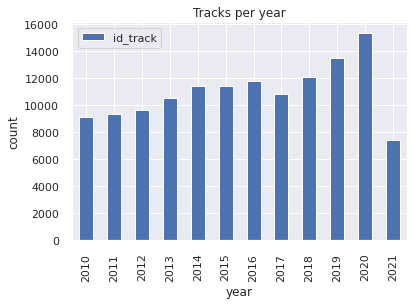

In [59]:
df_post_2010 = df_tracks[df_tracks.year >= 2010]

df_post_2010.groupby('year').agg({'id_track':'count'}).plot(kind='bar',title = 'Tracks per year',ylabel = 'count');

A mostly increasing trend can be viewed in the data.
The data set was uploaded April 21st.
For this reason, 2021 has fewer songs in comparison to previous years.
Assuming that the rate of song release is approximately uniform throughout the year - 2021 is likely to pass 2020 and continue the increasing trend.


How has the length of songs changed over time?

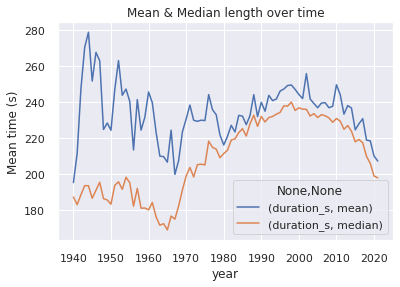

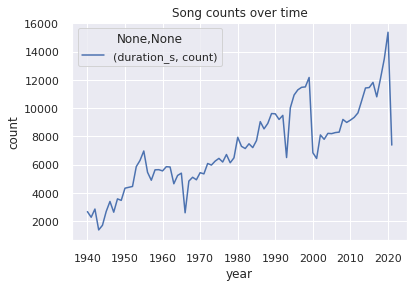

In [60]:
df_post_1940 = df_tracks[df_tracks.year >= 1940]
df_post_1940.groupby('year')[['duration_s']].agg(['mean','median']).plot(legend=True,title = 'Mean & Median length over time',ylabel = 'Mean time (s)')
df_post_1940.groupby('year')[['duration_s']].agg(['count']).plot(legend=True,title = 'Song counts over time',ylabel = 'count')

#df.B.plot(secondary_y=True,

The mean is larger than the median - because the duration is skewed to the right.
The line drops up to the 60's, rises up to the 2000, than drops again.
The data up to the 60's can be explain by fewer observations as seen by the data.
The rise can be explained by technological innovation (e.g. the transfer from Vynil to CD.
The drop of the 2000's can be explained by the appearance of new platforms such as Youtube, or possibly due to a shorter attention span

**4. Which artists have the most explicit songs in Spotify?**

<Figure size 1008x720 with 0 Axes>

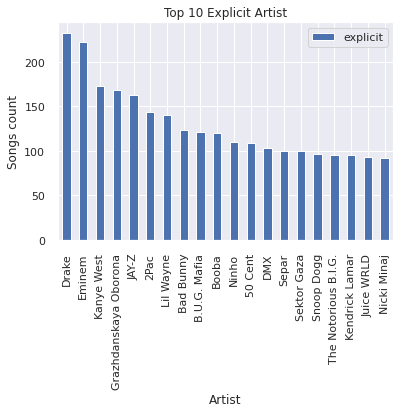

In [61]:
df_explicit = df_tracks.groupby('name_artist').agg({'explicit':sum})
plt.pyplot.figure(figsize=(14,10))
df_explicit.sort_values('explicit',ascending = False).head(20).plot(kind = 'bar', title = 'Top 10 Explicit Artist',ylabel = 'Songs count',xlabel = 'Artist')


**5. Explicit songs over time**

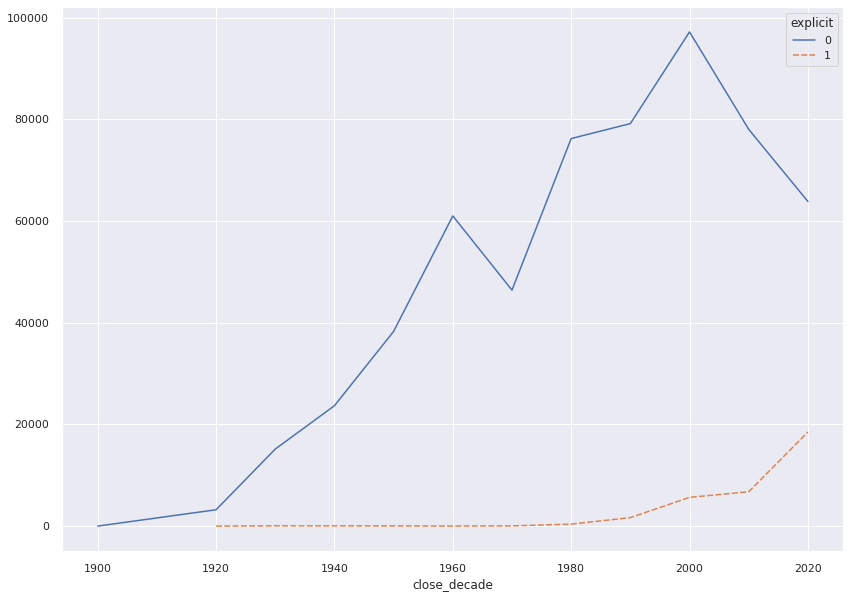

In [64]:
plt.pyplot.figure(figsize=(14,10))
df_tracks_pivot = df_tracks.pivot_table(index = "close_decade", 
                                        columns = "explicit", 
                                        values = "duration_s",
                                        aggfunc = 'count')
sns.lineplot(data=df_tracks_pivot)

It seems that the number of explicit songs grows with years.

However since the total number of songs is also increasing, we must check the proportion of explicit songs as well

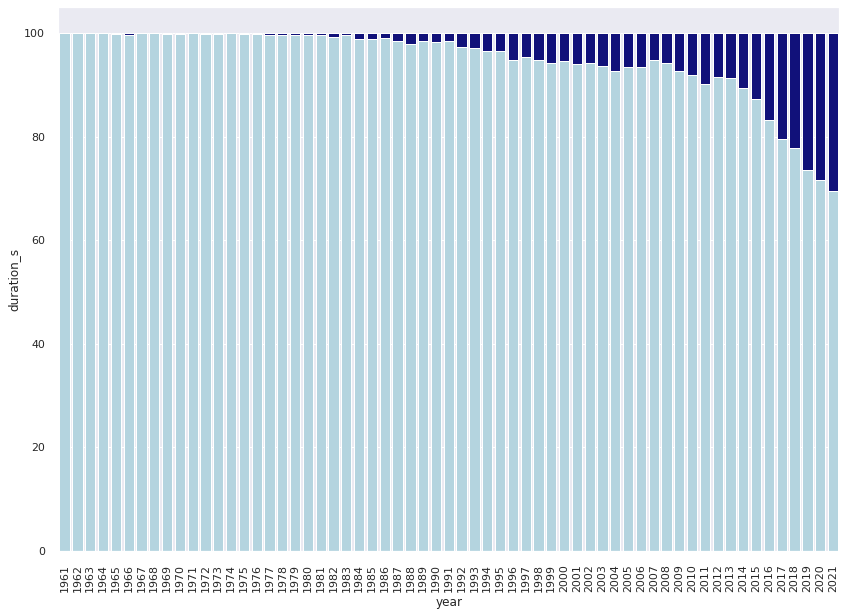

In [69]:
plt.pyplot.figure(figsize=(14,10))

df_explicit = df_tracks[df_tracks['year']>1960]
total = df_explicit.groupby('year')['duration_s'].count().reset_index()
explicit_songs = df_explicit[df_explicit.explicit==0].groupby('year')['duration_s'].count().reset_index()
explicit_songs['duration_s'] = [i / j * 100 for i,j in zip(explicit_songs['duration_s'], total['duration_s'])]
total['duration_s'] = [i / j * 100 for i,j in zip(total['duration_s'], total['duration_s'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="year",  y="duration_s", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="year", y="duration_s", data=explicit_songs, color='lightblue')
for item in bar1.get_xticklabels():
    item.set_rotation(90)

We can see that the proportion of explicit songs grows with time (even for the relative part of 2021, which is not a complete year in the dataset)

**6. What are the most commonly tagged genres**

explode genres:

In [70]:
df_genres = df_tracks[['id_track','genres', 'close_decade','duration_s','popularity_artist','popularity_track']]
#df_genres = df_genres.drop_duplicates(subset=['id_track'], keep='last')

df_genres['genres'].replace("[]","['missing genre']",inplace=True)
df_genres['genres'].fillna("['missing genre']", inplace=True)

df_genres['genres'] = df_genres['genres'].apply(literal_eval) #convert to list type
df_genres = df_genres.explode('genres')


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


There are 4538 unique genres


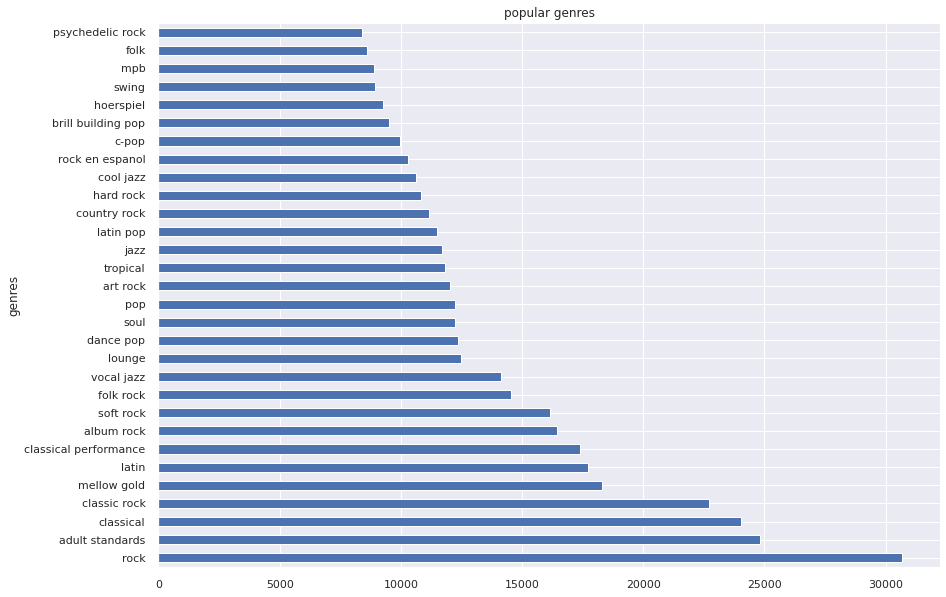

In [71]:
plt.pyplot.figure(figsize=(14,10))
df_genres_no_missing = df_genres[df_genres['genres']!="missing genre"]

print("There are",df_genres_no_missing['genres'].nunique(),"unique genres")
df_genres_no_missing['genres'].value_counts()[:30].plot(kind='barh',title = 'popular genres', ylabel = 'genres')


**7. Do genres change over time?**

In [40]:
f = lambda x: 1 if "'rap'" in str(x) or "'hip hop'" in str(x) else 0
df_tracks['rap_hip_hop'] = df_tracks['genres'].map(f)

f = lambda x: 1 if "'pop'" in str(x) or "'dance hop'" in str(x) else 0
df_tracks['pop_dance'] = df_tracks['genres'].map(f)

f = lambda x: 1 if "'blues'" in str(x) or "'jazz'" in str(x) else 0
df_tracks['blues_jazz'] = df_tracks['genres'].map(f)

f = lambda x: 1 if "'rock'" in str(x) else 0
df_tracks['rock'] = df_tracks['genres'].map(f)

df_tracks.groupby(['rap_hip_hop','pop_dance','blues_jazz','rock'])[['id_track']].count()

id_track
rap_hip_hop pop_dance blues_jazz rock          
0           0         0          0       549835
                                 1        30062
                      1          0        14682
                                 1          546
            1         0          0        11383
                                 1           90
1           0         0          0         8180
            1         0          0          754

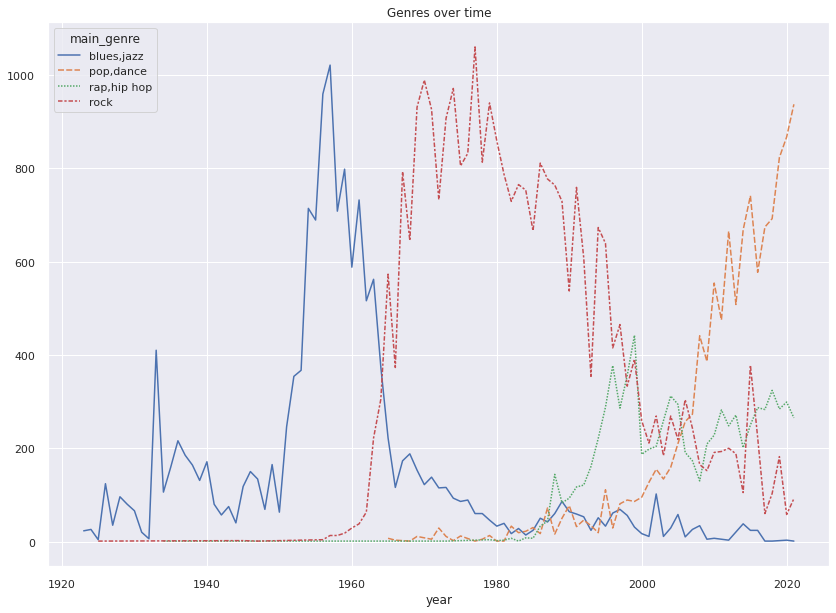

In [76]:
df_tracks['main_genre'] = np.where((df_tracks['rap_hip_hop']==1) & (df_tracks['pop_dance']==0) & (df_tracks['blues_jazz']==0) & (df_tracks['rock']==0),'rap,hip hop',
                          np.where((df_tracks['rap_hip_hop']==0) & (df_tracks['pop_dance']==1) & (df_tracks['blues_jazz']==0) & (df_tracks['rock']==0),'pop,dance',
                          np.where((df_tracks['rap_hip_hop']==0) & (df_tracks['pop_dance']==0) & (df_tracks['blues_jazz']==1) & (df_tracks['rock']==0),'blues,jazz',
                          np.where((df_tracks['rap_hip_hop']==0) & (df_tracks['pop_dance']==0) & (df_tracks['blues_jazz']==0) & (df_tracks['rock']==1),'rock',
                                                                                                                              'other'))))
df_genres = df_tracks[df_tracks['main_genre']!='other']

df_genres_pivot = df_genres.pivot_table(index = "year", 
                                        columns = "main_genre", 
                                        values = "id_track",
                                        aggfunc = 'count')
plt.pyplot.figure(figsize=(14,10))
fig = sns.lineplot(data=df_genres_pivot).set_title("Genres over time");



As expected, genres change over time:
- Blues was mostly popular during the 60's, and can be traced back as early as 1920's
- Rock has appeared around the 60's and was mostly popular during the 80's
- Hip hop emerged late 80's and was mostly popular during the 90-00's
- Pop music started in 90's-2000's and is mostly popular during today

In terms of volume, rap has significantly less songs in comparison to the other three genres, suggesting it was never as mainstream as them.

**8. Are track characteristics correlated?**

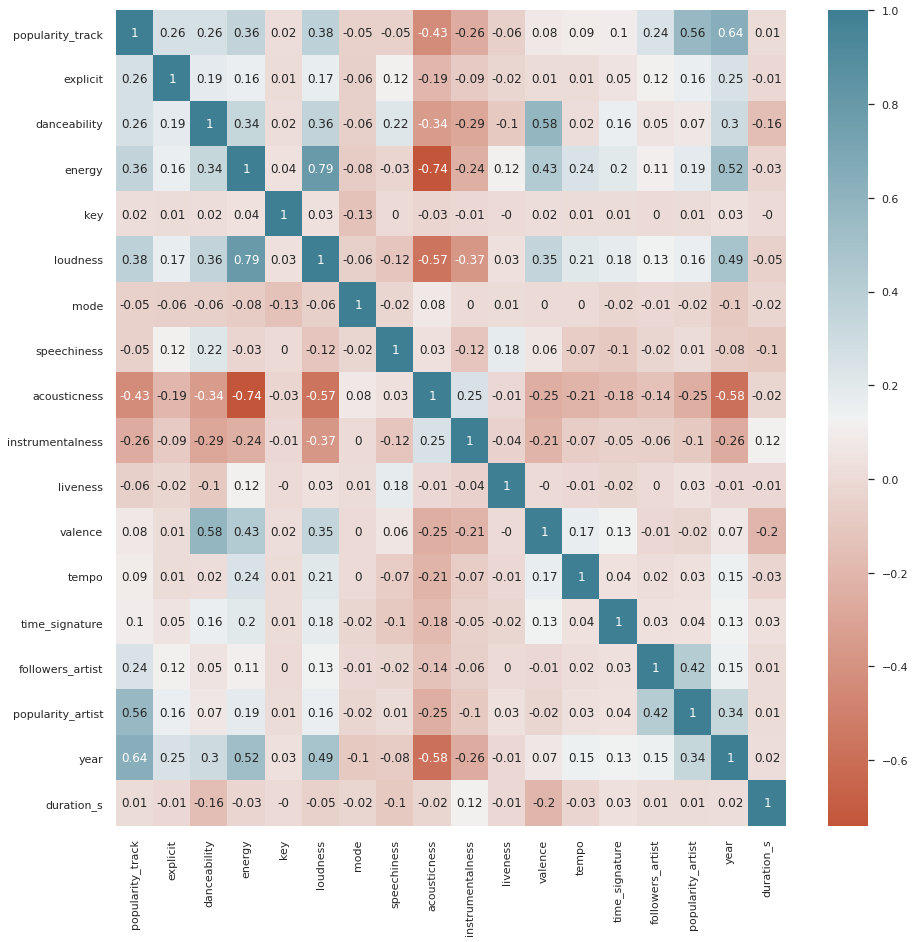

In [42]:
plt.pyplot.figure(figsize=(15,15))
int_cols = df_tracks.drop(['rap_hip_hop','pop_dance','blues_jazz','rock','close_decade'],axis=1).select_dtypes(include=np.number).columns.tolist()
int_columns = df_tracks[int_cols]
sns.set(font_scale=1) # Set font size
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(data=round(int_columns.corr(),2), cmap=palette, annot=True);

**9. Visualizing the connections between variables**

<Figure size 1008x720 with 0 Axes>

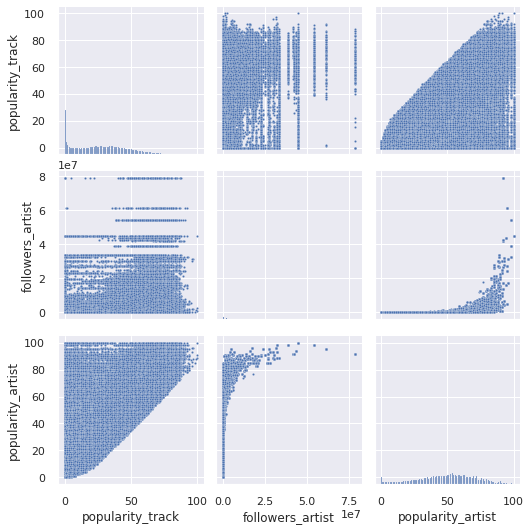

In [43]:
relevant_columns = df_tracks[['popularity_track', 'followers_artist', 'popularity_artist']]                             
plt.pyplot.figure(figsize=(14,10))
sns.pairplot(relevant_columns,plot_kws={"s": 5})

<Figure size 864x576 with 0 Axes>

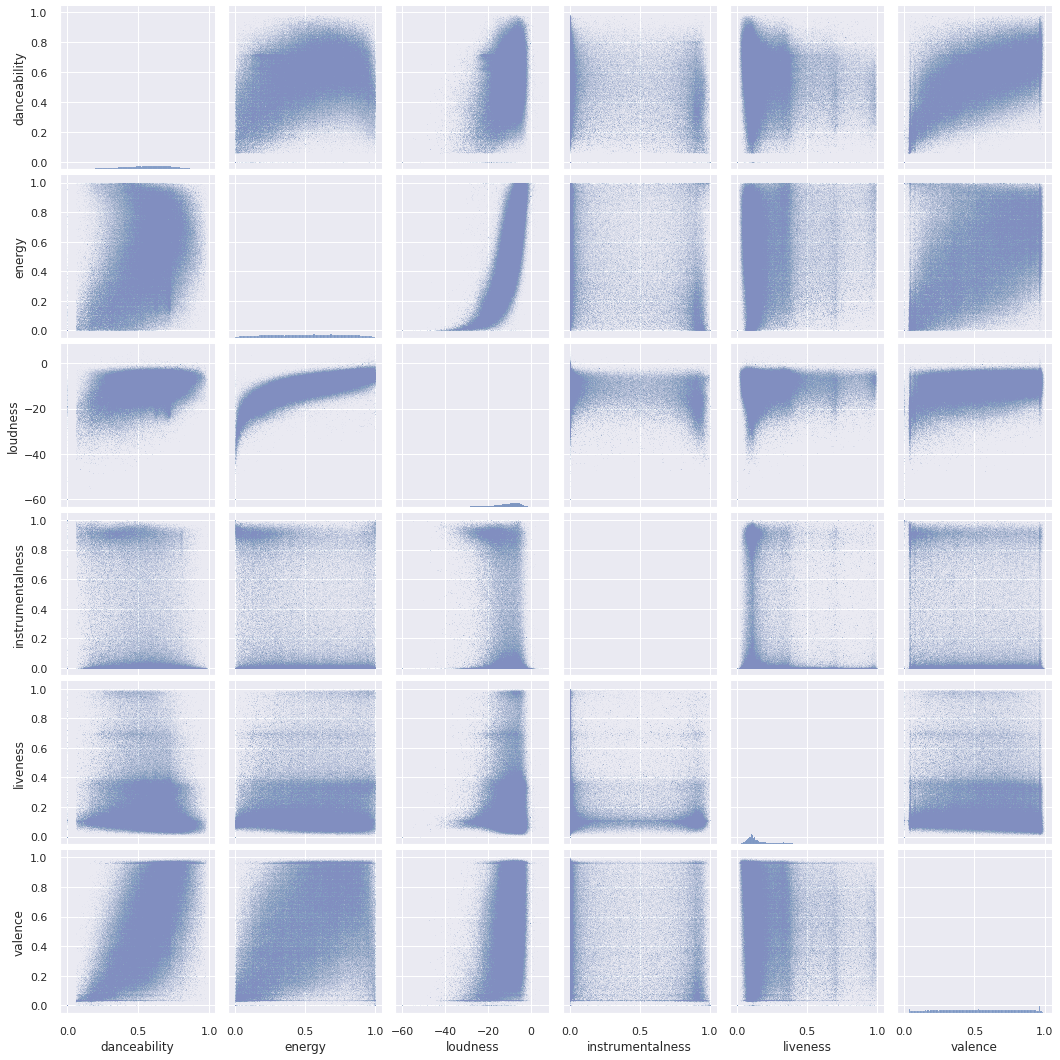

In [44]:
relevant_columns = df_tracks[['danceability','energy', 'loudness',
                              'instrumentalness', 'liveness','valence']]
                          
plt.pyplot.figure(figsize=(12,8))
sns.pairplot(relevant_columns,plot_kws={"s": 0.05})


From the above plots several conclusions can be reached:
- There is a connection between the popularity of a track and the popularity of an artist.

- It seems that the popularity of a track is somewhat upper bound by the popularity of an artist (a popular artist can have non-popular songs, but a popular song will almost always be bound by the popularity of the artist)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


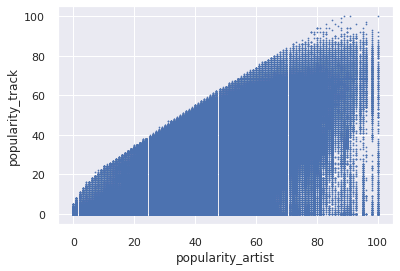

In [45]:
df_tracks.plot(x = 'popularity_artist', y = 'popularity_track',kind = 'scatter',s = 0.5)

As seen from the correlation matrix (and as suspected), an acoustic song tends to have less energy

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


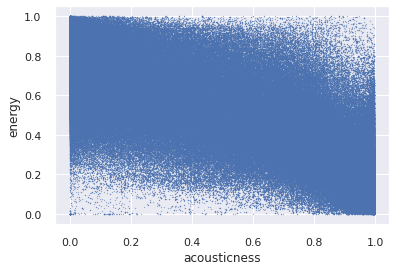

In [46]:
df_tracks.plot(x = 'acousticness', y = 'energy',kind = 'scatter',s = 0.05)

The louder the song the higher the energy:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


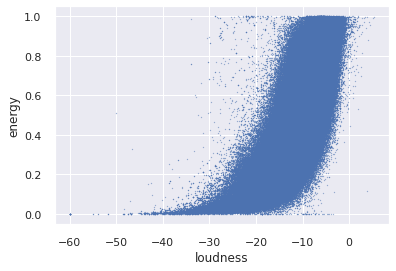

In [47]:
df_tracks.plot(x = 'loudness', y = 'energy',kind = 'scatter',s = 0.05)

Many combinations of energy and valence are possible, but there are almost no songs that are high valence and low energy or the opposite.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


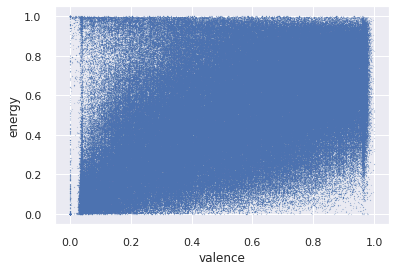

In [48]:
df_tracks.plot(x = 'valence', y = 'energy',kind = 'scatter',s = 0.01)

**10. Statistical plots and analyses:**

Comparing means using Boxplot - Energy by Decade:

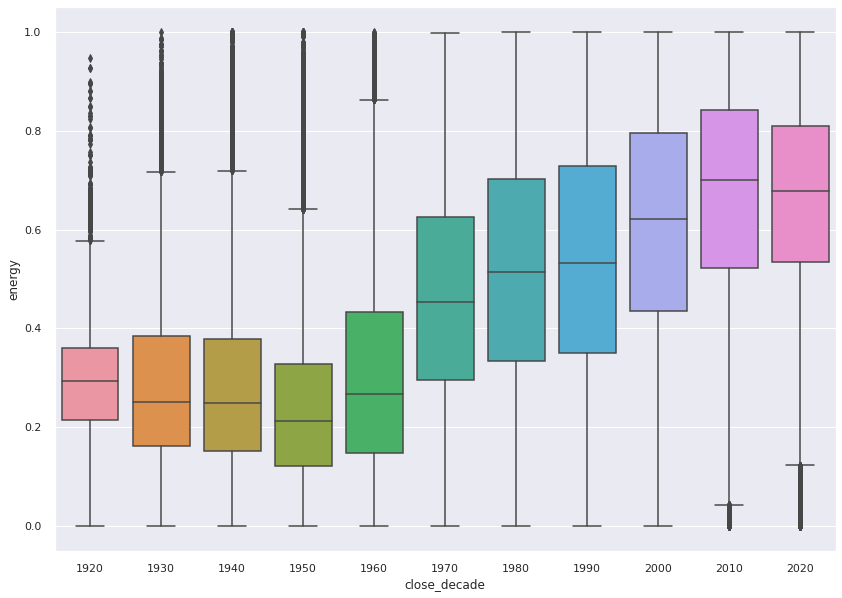

In [49]:
plt.pyplot.figure(figsize=(14,10))
sns.boxplot(x="close_decade", y="energy", data = df_tracks[df_tracks['close_decade']>1900]);       

Visually, we can see a difference between the mean energy of each year, which corresponds with previous conclusions - genres changing over area, and energy being correlated with several song characteristics

Normalizing variables and creating a QQ-plot to test Normality assumption:

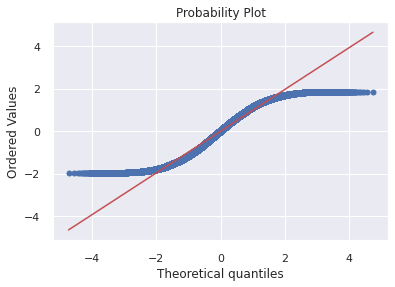

In [50]:
measurements = (df_tracks['energy']-df_tracks['energy'].mean())/df_tracks['energy'].std()
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

- Data does not seem normally distributed: tails are lighter in comparison to Normal
- The Boxplot suggests that the assumption of equal variances may not hold (by looking at the IQR)

Comparing means using Boxplot - Tempo by Decade:

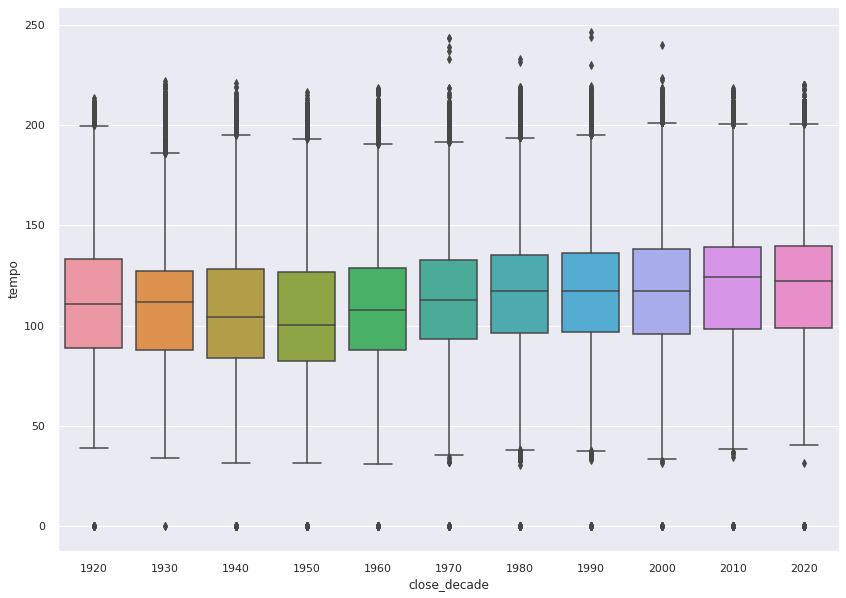

In [51]:
plt.pyplot.figure(figsize=(14,10))
sns.boxplot(x="close_decade", y="tempo", data = df_tracks[df_tracks['close_decade']>1900])

       

Normalizing variables and creating a QQ-plot to test Normality assumption:

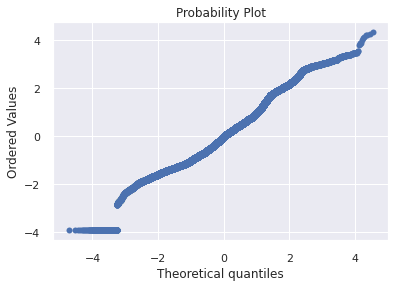

In [52]:
measurements = (df_tracks['tempo']-df_tracks['tempo'].mean())/df_tracks['tempo'].std()
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

Though not formally checked, assumptions of normality and equal variances seem to hold better than previous.
Also, assumption of independence between decades may seem more reasonable than, for example, by year (decades tend to have different music styles, unlike years)

**11. ANOVA:**

H0: all means are the same

H1: otherwise (at least two means are different)

In [53]:
lm = ols('tempo ~ close_decade', data = df_tracks).fit()
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                    df        sum_sq       mean_sq             F  PR(>F)
close_decade       1.0  1.138981e+07  1.138981e+07  13023.734832     0.0
Residual      615529.0  5.383061e+08  8.745423e+02           NaN     NaN


The test statistic and P-value show that we can reject H0 under any reasonable significance level and conclude that at least 2 of the tempo means are different between decades.

**12. Chi-square test for independence:**

H0: The explicitness of a song in independent of its genre being rap/hip-hop or other

H1: Otherwise (dependence btween genre of rap/hip-hop vs. other and explicitness)

In [54]:
contingency_table = pd.crosstab(df_tracks.explicit, df_tracks.rap_hip_hop, margins=True)
contingency_table

rap_hip_hop,0,1,All
explicit,,,
0,579756,2616,582372
1,26842,6318,33160
All,606598,8934,615532


explicit,0,1
rap_hip_hop,,
0,0.955750,0.044250
1,0.292814,0.707186


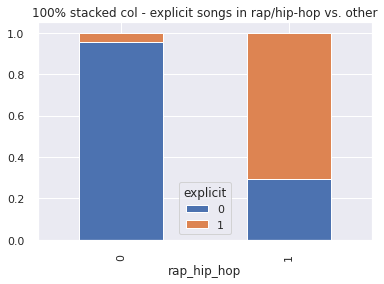

In [78]:
contingency_table2 = pd.crosstab(df_tracks.rap_hip_hop, df_tracks.explicit, margins=False,normalize='index')
contingency_table2.plot.bar(stacked=True, title = '100% stacked col - explicit songs in rap/hip-hop vs. other')

contingency_table2

In [56]:
from scipy.stats import chi2_contingency

chi_square_statistic = chi2_contingency(contingency_table)[0]
P_val = chi2_contingency(contingency_table)[1]
chi_square_test_df = chi2_contingency(contingency_table)[2]

print("The test statistic is",round(chi_square_statistic,2),"and the P-value is", P_val,"with",chi_square_test_df,"degrees of freedom")

The test statistic is 75914.67 and the P-value is 0.0 with 4 degrees of freedom


We can conclude with any reasonable significance level that the there is dependence between song genre (rap/hip-hop vs. other) and explicitness)